# Comparing Cumulative Incidence from different Model Runs

In this we will look at some of the vizualisation functionality to show the different cumulative incidence across different models runs where each run could be exploring a different parameter space.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np

In [3]:
sys.path.append('../')

In [4]:
import pyvoltic.probability_generating_functions as pgf

In [5]:
from pyvoltic.models import SIRNE, SIRSR, EBCM

In [6]:
import pyvoltic.vizualisations as sv

## Static Random

In [7]:
sir_sr = SIRSR(pgf.poisson_calc_g,
     pgf.poisson_calc_g1,
     pgf.poisson_calc_g2,
     probability_lambda=3)

In [8]:
sir_sr_low = sir_sr.run_simulation(0.2, 0.1,  0.0001, 25)
sir_sr_mid = sir_sr.run_simulation(0.5, 0.1,  0.0001, 25)
sir_sr_high = sir_sr.run_simulation(1.5, 0.1, 0.0001, 25)

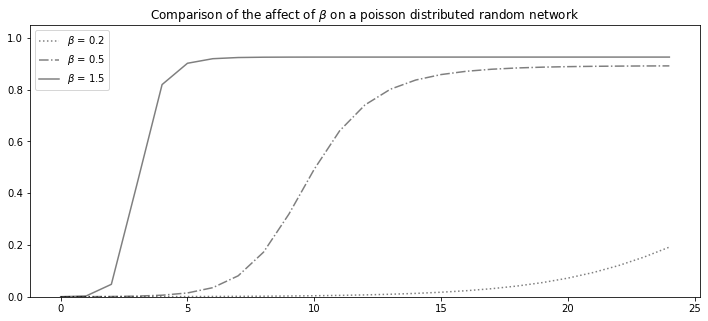

In [9]:
beta = '\\beta'
title_ = 'Comparison of the affect of {} on a poisson distributed random network' 
sv.SR_multi_cumulative_incidence([sir_sr_low.output, 
                                  sir_sr_mid.output,
                                 sir_sr_high.output], 
                                 title_.format('$%s$'%beta), 
                                 ['{} = {}'.format('$%s$'%beta, sir_sr_low.param_dic['r']),
                                '{} = {}'.format('$%s$'%beta, sir_sr_mid.param_dic['r']),
                                '{} = {}'.format('$%s$'%beta, sir_sr_high.param_dic['r'])],
                                 [':','-.','-'])

## Neighbour Exchange

In [10]:
sir_ne = SIRNE(pgf.poisson_calc_g,
     pgf.poisson_calc_g1,
     pgf.poisson_calc_g2,
     probability_lambda=3)

In [11]:
sir_ne_low = sir_ne.run_simulation(0.5, 0.5, 0.2, 0.0001, 25)
sir_ne_mid = sir_ne.run_simulation(0.5, 0.5, 0.5, 0.0001, 25)
sir_ne_high = sir_ne.run_simulation(0.5, 0.5, 2, 0.0001, 25)

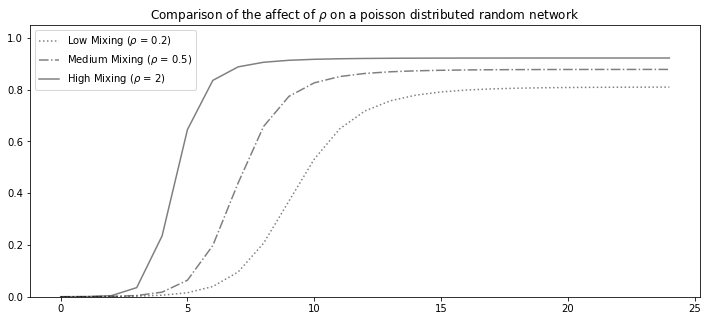

In [12]:
rho = '\\rho'
title_ = 'Comparison of the affect of {} on a poisson distributed random network' 
sv.NE_multi_cumulative_incidence([sir_ne_low.output, 
                                  sir_ne_mid.output,
                                 sir_ne_high.output], 
                                 title_.format('$%s$'%rho), 
                                 ['Low Mixing ({} = 0.2)'.format('$%s$'%rho),
                                'Medium Mixing ({} = 0.5)'.format('$%s$'%rho),
                                'High Mixing ({} = 2)'.format('$%s$'%rho)],
                                 [':','-.','-'])

## Edge Based Compartmental Model

With this cumulative incidence function both the Edge Based Compartmental Model and the Mean Field Social Heterogeneity Model can be used with `EBCM_multi_cumulative_incidence`

In [13]:
ebcm_sr = EBCM(pgf.powerlaw_calc_g,
     pgf.powerlaw_calc_g1,
     pgf.powerlaw_calc_g2,
     probability_lambda=pgf.powerlaw_p_vec(2.2, 75))

In [14]:
ebcm_sr_low = ebcm_sr.run_simulation(0.2, 0.1,  0.0001, 20)
ebcm_sr_mid = ebcm_sr.run_simulation(0.5, 0.1,  0.0001, 20)
ebcm_sr_high = ebcm_sr.run_simulation(1.5, 0.1, 0.0001, 20)

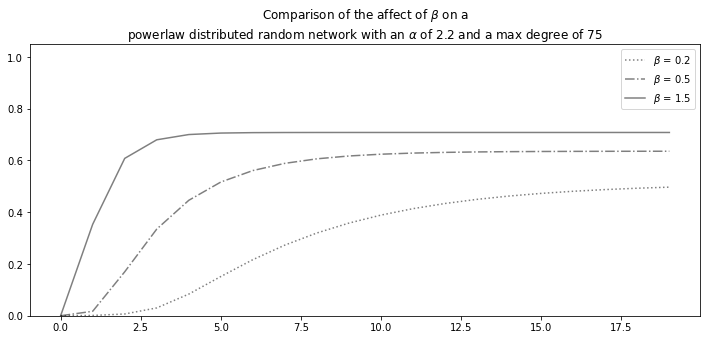

In [15]:
beta = '\\beta'
alpha = '\\alpha'
title_ = 'Comparison of the affect of {} on a\npowerlaw distributed random network with an {} of 2.2 and a max degree of 75' 
sv.EBCM_multi_cumulative_incidence([ebcm_sr_low.output, 
                                  ebcm_sr_mid.output,
                                 ebcm_sr_high.output], 
                                 title_.format('$%s$'%beta, '$%s$'%alpha), 
                                 ['{} = {}'.format('$%s$'%beta, ebcm_sr_low.param_dic['beta']),
                                '{} = {}'.format('$%s$'%beta, ebcm_sr_mid.param_dic['beta']),
                                '{} = {}'.format('$%s$'%beta, ebcm_sr_high.param_dic['beta'])],
                                 [':','-.','-'])